# Predicting psychiatric readmission from clinical notes
This notebook will show the results of 6 models:
- LSTM with no pre-trained embedding
- LSTM with GloVe pre-trained embedding
- BERT Base (as feature extractor)
- BERT Base (full)
- BERT Discharge (as feature extractor)
- BERT Discharge (full)

In [30]:
import pickle
import pandas as pd
import numpy as np

from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [31]:
#load test data
dtest = pd.read_csv('project_dtest_clean.csv')

In [32]:
y_true = dtest['READMIT']

In [33]:
#Load everything
#Best model: bert clinic - lr = 2e-5 - batchsize 6
y_pred_clinicbase = pickle.load(open( "bert_clinic_base_ypred.pkl", "rb" ))
y_proba_clinicbase = pickle.load(open( "bert_clinic_base_yproba.pkl", "rb" ))

#Model bert clinic - train only classifier - lr = 2e2 - batchsize 12 - epoch 10
y_pred_clinicFC = pickle.load(open( "bert_clinic_fc_2e2_ypred.pkl", "rb" ))
y_proba_clinicFC = pickle.load(open( "bert_clinic_fc_2e2_yproba.pkl", "rb"))
                              
#Model bert base - train full - lr = 2e-5 - batch 12
y_pred_bert_pretrained = pickle.load(open( "model_bert_pretrained_ypred.pkl", "rb" ))
y_proba_bert_pretrained = pickle.load(open( "model_bert_pretrained_yproba.pkl", "rb" ))        
                        
#Model bert base - train classifier - lr = 1e-2 - batch 12   
y_pred_bert_pretrainedFC = pickle.load(open( "model_bert_pretrained_fc__ypred.pkl", "rb"))
y_proba_bert_pretrainedFC = pickle.load(open( "model_bert_pretrained_fc_yproba.pkl", "rb"))

In [34]:
#Model LSTM - no embedding  
y_pred_LSTM_noembedding = pickle.load(open( "model_lstm_noglove_ypred.pkl", "rb"))
y_proba_LSTM_noembedding = pickle.load(open( "model_lstm_noglove_yproba.pkl", "rb"))

y_proba_LSTM_glove = pickle.load(open( "model_lstm_glove_yproba.pkl", "rb"))


In [35]:
y_proba = [y_proba_LSTM_noembedding, y_proba_LSTM_glove, y_proba_bert_pretrainedFC, y_proba_bert_pretrained, y_proba_clinicFC, y_proba_clinicbase]
name = ['LSTM (no embedding)', 'LSTM (GloVe embedding)','Bert base (feature extractor)', 'Bert base (full)', 
        'Bert discharge (feature extractor)','Bert discharge (full)']

### ROC curves and AUC

**ROC curves for all models**

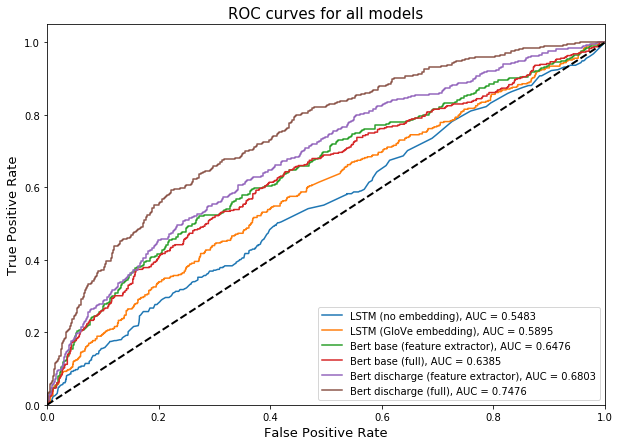

In [36]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10,7))
for i in range(len(y_proba)):    
    fpr[i], tpr[i], _ = roc_curve(y_true, y_proba[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(len(y_proba)):
    la = name[i] + ', AUC = {:0.4f}'.format(roc_auc[i])
    plt.plot(fpr[i], tpr[i],label=la)
    
lw=2

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title('ROC curves for all models',fontsize=15)
plt.legend(loc="lower right")
plt.show()


**ROC curves for BERT Discharge's hyperparameter tuning**

In [26]:
#Load everything
#Best model: bert clinic - lr = 2e-5 - batchsize 6
y_pred_clinicbase_2e56 = pickle.load(open( "bert_clinic_base_ypred.pkl", "rb" ))
y_proba_clinicbase_2e56 = pickle.load(open( "bert_clinic_base_yproba.pkl", "rb" ))

#Best model: bert clinic - lr = 2e-5 - batchsize 12
y_pred_clinicbase_2e512 = pickle.load(open( "bert_clinic_base2e5_ypred.pkl", "rb" ))
y_proba_clinicbase_2e512 = pickle.load(open( "bert_clinic_base2e5_yproba.pkl", "rb" ))


#Best model: bert clinic - lr = 3e-5 - batchsize 6
y_pred_clinicbase_3e56 = pickle.load(open( "bert_clinic_base3e5_ypred.pkl", "rb" ))
y_proba_clinicbase_3e56 = pickle.load(open( "bert_clinic_base3e5_yproba.pkl", "rb" ))

#Best model: bert clinic - lr = 3e-5 - batchsize 12
y_pred_clinicbase_3e512 = pickle.load(open( "bert_clinic_base3_ypred.pkl", "rb" ))
y_proba_clinicbase_3e512 = pickle.load(open( "bert_clinic_base3_yproba.pkl", "rb" ))


In [27]:
y_proba = [y_proba_clinicbase_3e512, y_proba_clinicbase_2e512, y_proba_clinicbase_3e56, y_proba_clinicbase_2e56]
y_pred = [y_pred_clinicbase_3e512, y_pred_clinicbase_2e512, y_pred_clinicbase_3e56, y_pred_clinicbase_2e56]
name = ['lr = 3e-5, batch size = 12', 'lr = 2e-5, batch size = 12', 'lr = 3e-5, batch size = 6', 'lr = 2e-5, batch size = 6']
true = [176,183,172,235]
prec = [i/412 for i in true]
prec

[0.42718446601941745,
 0.4441747572815534,
 0.4174757281553398,
 0.5703883495145631]

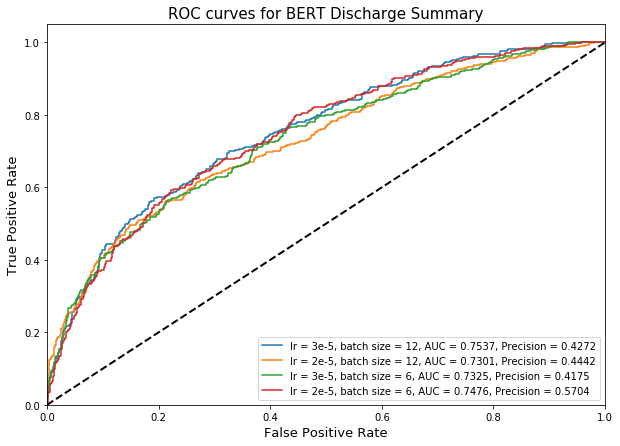

In [28]:
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10,7))
for i in range(len(y_proba)):    
    fpr[i], tpr[i], _ = roc_curve(y_true, y_proba[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(len(y_proba)):
    la = name[i] + ', AUC = {:0.4f}'.format(roc_auc[i]) + ', Precision = {:0.4f}'.format(prec[i])
    plt.plot(fpr[i], tpr[i],label=la)
    
lw=2

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title('ROC curves for BERT Discharge Summary',fontsize=15)
plt.legend(loc="lower right")
plt.show()

### Confusion matrix

In [9]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)
    #print(cm.shape)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(-0.5, cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return None


classes = ['no readmission','readmission']

BERT Discharge (lr = 3e5, batch size =12)
BERT Discharge (lr = 2e5, batch size =12)
BERT Discharge (lr = 3e5, batch size =6)
BERT Discharge (lr = 2e5, batch size =6)


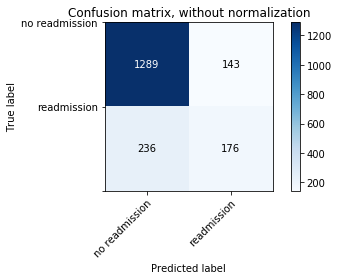

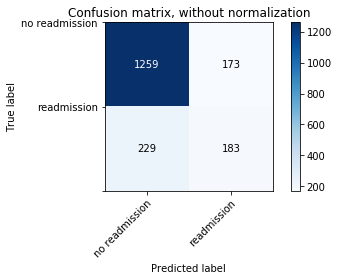

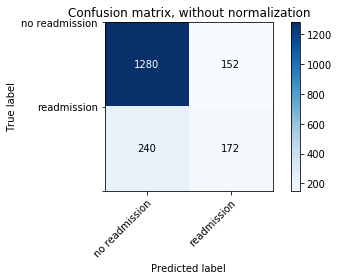

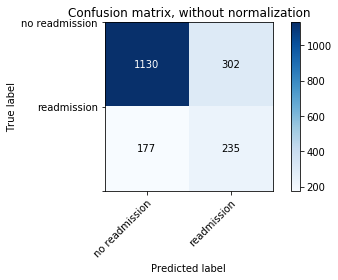

In [16]:
y_pred_name = ['BERT Discharge (lr = 3e5, batch size =12)', 
               'BERT Discharge (lr = 2e5, batch size =12)',
               'BERT Discharge (lr = 3e5, batch size =6)',
               'BERT Discharge (lr = 2e5, batch size =6)']
for i in range(len(y_pred)):
    plot_confusion_matrix(y_true,y_pred[i], classes)
    print(y_pred_name[i])

### Check the misclassified instances

In [84]:
from itertools import compress

In [78]:
dtest = pd.read_csv('project_dtest_clean.csv',index_col = 0)

In [81]:
dtest2 = dtest
dtest2['Y_PREDICT'] = y_pred_clinicbase
dtest2['Y_PROBA'] = y_proba_clinicbase
dtest2 = dtest2.rename(columns = {'TEXT':'DISCHARGE NOTE','READMIT': 'Y_TRUE'})

In [82]:
dtest2.columns

Index(['DISCHARGE NOTE', 'Y_TRUE', 'Y_PREDICT', 'Y_PROBA'], dtype='object')

In [89]:
idx = dtest2['Y_PREDICT'] != dtest2['Y_TRUE']
res = list(compress(range(len(idx)), idx))

In [93]:
misclassified_dtest = dtest2.iloc[res]
misclassified_dtest

,DISCHARGE NOTE,Y_TRUE,Y_PREDICT,Y_PROBA
2147,Admission Date: 2103-7-11 Discharge...,1,0,0.358101
9123,Admission Date: 2131-10-25 ...,1,0,0.158977
4049,Admission Date: 2135-10-4 ...,0,1,0.634131
3112,Admission Date: 2101-3-30 ...,0,1,0.607866
568,Admission Date: 2139-9-1 D...,1,0,0.464385
...,...,...,...,...
485,Admission Date: 2110-8-26 Dischar...,1,0,0.492290
7513,Admission Date: 2150-6-27 ...,0,1,0.691800
1667,Admission Date: 2179-4-27 ...,0,1,0.628177
1103,Admission Date: 2108-12-24 ...,0,1,0.634176


In [94]:
misclassified_dtest.to_csv('misclassified_dtest.csv')

In [95]:
misclassified_dtest.describe()

,Y_TRUE,Y_PREDICT,Y_PROBA
count,479.000000,479.000000,479.000000
mean,0.369520,0.630480,0.495464
std,0.483179,0.483179,0.156529
min,0.000000,0.000000,0.077370
25%,0.000000,0.000000,0.398754
50%,0.000000,1.000000,0.537491
75%,1.000000,1.000000,0.604758
max,1.000000,1.000000,0.794274


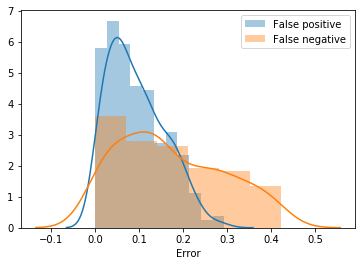

In [148]:
import seaborn as sns
sns.distplot(np.abs(misclassified_dtest[misclassified_dtest['Y_TRUE']==0]['Y_PROBA']-0.5),label ='False positive')
sns.distplot(np.abs(misclassified_dtest[misclassified_dtest['Y_TRUE']==1]['Y_PROBA']-0.5),label ='False negative')
plt.xlabel('Error')
plt.legend()


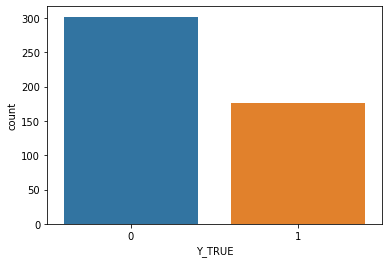

In [144]:
sns.countplot(misclassified_dtest['Y_TRUE'])

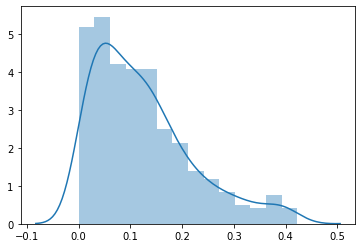

In [121]:
sns.distplot(err)

In [118]:
err = np.abs(misclassified_dtest['Y_TRUE']-misclassified_dtest['Y_PROBA']) - 0.5 


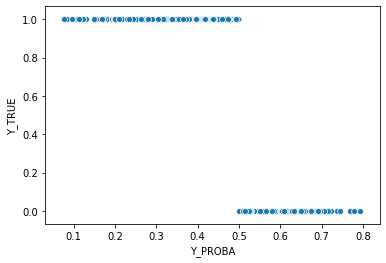

In [109]:
sns.scatterplot(x='Y_PROBA', y= 'Y_TRUE', data = misclassified_dtest)

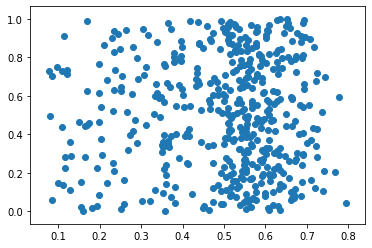

In [111]:
plt.scatter(misclassified_dtest['Y_PROBA'], np.linspace(0,1,len(misclassified_dtest['Y_PROBA'])))